# PyTorch dataset

Using `torch.utils.data.dataset.random_split` to split a given dataset into more than one (sub)datasets.  This is handy since it can be used to create training, validation, and test sets.

- Use training set for training purposes.
- Use validation set during training to check *underfitting* and *overfitting*.  If the model does very well on training data, but does poorly on validation data then the model is overfitting, i.e., the model will not generalize well.
- Neither validation nor test data is ever used for training purposes. 

In [75]:
import pprint as pp

(-3, 10)

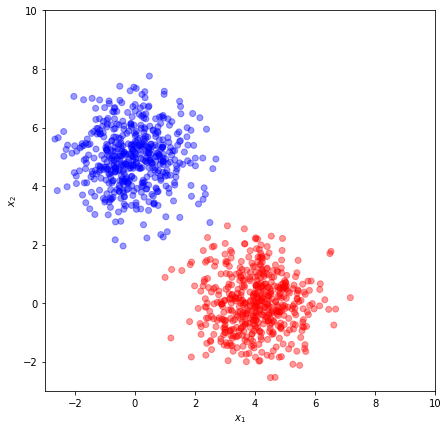

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

np.random.seed(0)

from sklearn import datasets
n_samples = 1000
x, y = datasets.make_blobs(n_samples=n_samples, n_features=2, centers=[(0,5),(4,0)], random_state=0)

plt.figure(figsize=(7,7))
plt.scatter(x[:,0], x[:,1], c=y, cmap=cm.bwr, alpha=0.4)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim(-3,10)
plt.ylim(-3,10)

Our own dataset class.  The benefit is that we can use this class within the dataloader class.

In [77]:
import torch
from torch.utils.data import Dataset

class MyDataset(Dataset):
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __getitem__(self, index):
        sample = {
            'feature': torch.tensor([self.x[index]], dtype=torch.float32), 
            'label': torch.tensor([self.y[index]], dtype=torch.long)}
        return sample
    
    def __len__(self):
        return len(self.x)

In [78]:
dataset = MyDataset(x, y)
print('length: ', len(dataset))
for i in range(len(dataset)):
    #pp.pprint(dataset[i])
    pass

length:  1000


Using `random_split` to split the data into training and testing sets.

In [70]:
from torch.utils.data import random_split
train, test = random_split(dataset, [800, 200])

Just confirming that random_split is doing what it is supposed to.  There is no overlap between the two (sub)datasets.

In [71]:
print('train length: ', len(train))
x_train = np.empty((2, len(train)))
y_train = np.empty((len(train)))
for i in range(len(train)):
    #pp.pprint(train[i])
    x_train[:,i] = train[i]['feature'].numpy().reshape(2)
    y_train[i] = train[i]['label'][0].numpy()

print('test length: ', len(test))    
x_test = np.empty((2, len(test)))
y_test = np.empty((len(test)))
for i in range(len(test)):
    #pp.pprint(test[i])
    x_test[:,i] = test[i]['feature'].numpy().reshape(2)
    y_test[i] = test[i]['label'][0].numpy()

train length:  800
test length:  200


(-3, 10)

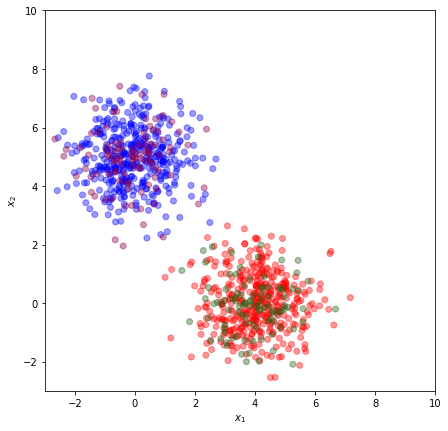

In [72]:
plt.figure(figsize=(7,7))
plt.scatter(x_train[0,:], x_train[1,:], c=y_train, cmap=cm.bwr, alpha=0.4)
plt.scatter(x_test[0,:], x_test[1,:], c=y_test, cmap=cm.PiYG, alpha=0.4)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim(-3,10)
plt.ylim(-3,10)